In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
df = pd.read_csv("House Price Prediction.csv")

In [57]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [60]:
df.shape

(4600, 18)

In [61]:
# Convert the 'date' column to datetime format
df["date"] = pd.to_datetime(df["date"])

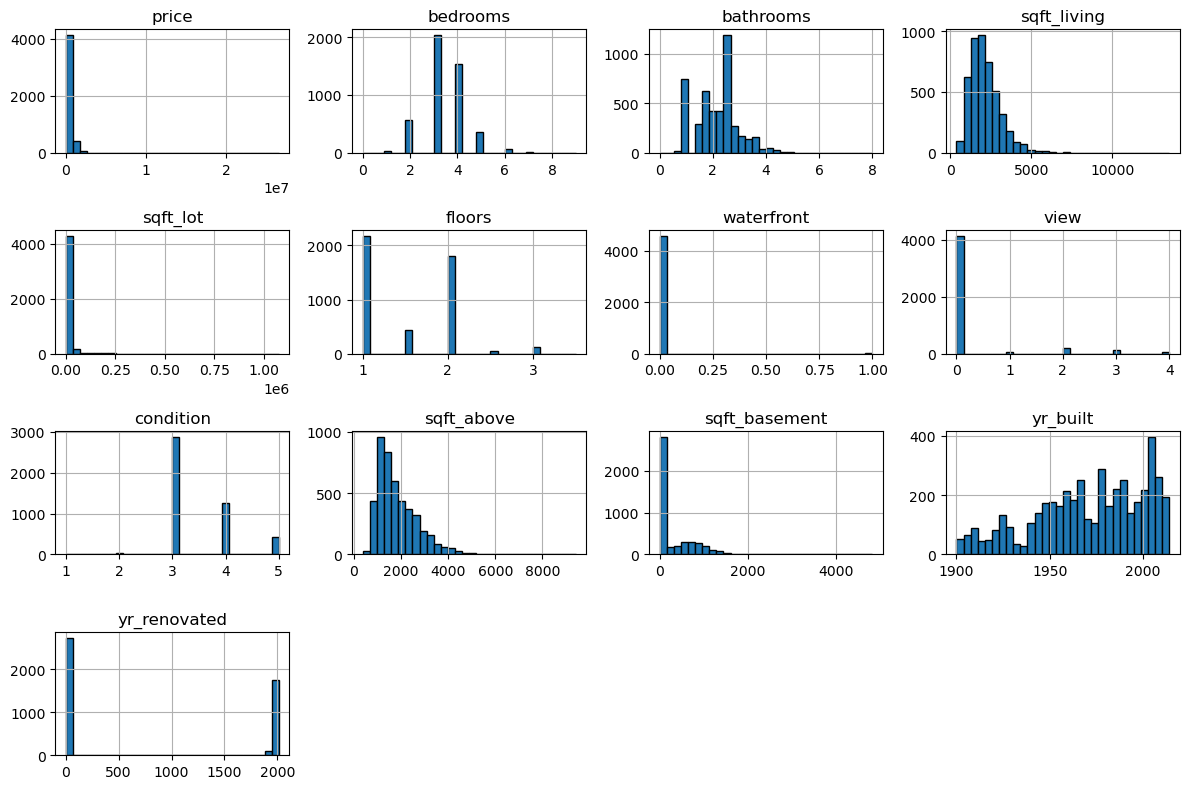

In [63]:
# Selecting numeric columns only to see distributions
numeric_columns = df.select_dtypes(include=['number']).columns

# Create histograms for each numeric column
df[numeric_columns].hist(figsize=(12, 8), bins=30, layout=(4, 4), edgecolor='black')

# Adjust the layout to avoid overlap
plt.tight_layout()
plt.show()

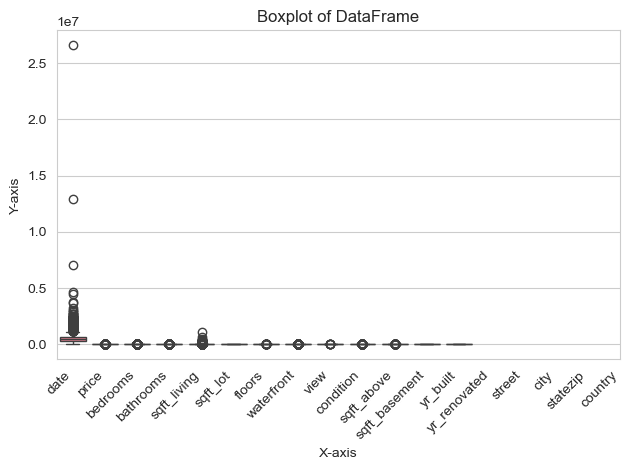

In [67]:
ax = sns.boxplot(df)
ax.set(title='Boxplot of DataFrame', xlabel='X-axis', ylabel='Y-axis')
plt.xticks(ticks=range(len(df.columns)), labels=df.columns, rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [69]:
df.describe()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4600,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,2014-06-07 03:14:42.782608640,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
min,2014-05-02 00:00:00,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,2014-05-21 00:00:00,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,2014-06-09 00:00:00,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,2014-06-24 00:00:00,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2014-07-10 00:00:00,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000
std,NaN,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536


In [70]:
df.value_counts("city")

city
Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
Vashon                   29
SeaTac                   29
Tukwila                  29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Fall City                11
Medina                   11
Black Diamond             9
Ravensdale                7
Pacific        

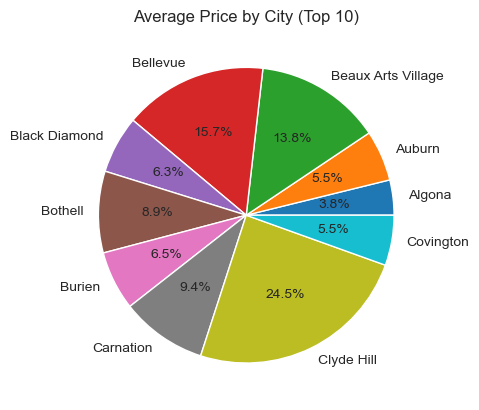

In [71]:
data = df.groupby("city")["price"].mean().head(10)
plt.pie(data, labels=data.index, autopct='%1.1f%%')
plt.title('Average Price by City (Top 10)')
plt.show()

In [72]:
df.groupby("sqft_lot")[["bedrooms","bathrooms","floors","view","condition"]].sum().sort_values(by="sqft_lot",ascending=False).head(15)


,bedrooms,bathrooms,floors,view,condition
sqft_lot,,,,,
1074218,5,3.25,1.5,0,5
641203,2,2.00,2.0,0,3
478288,3,1.75,1.5,3,4
435600,6,5.50,3.5,3,5
423838,2,1.00,1.0,2,5
389126,3,1.00,1.5,0,4
327135,3,2.50,2.0,0,3
307752,7,8.00,3.0,4,3
306848,3,1.00,1.0,0,3


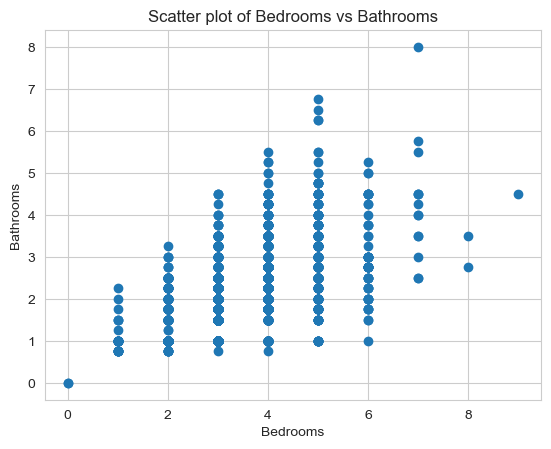

In [73]:
plt.scatter(x="bedrooms",y="bathrooms",data=df)
plt.xlabel("Bedrooms")
plt.ylabel("Bathrooms")
plt.title("Scatter plot of Bedrooms vs Bathrooms")
plt.show()

In [74]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [83]:
X=df[["bedrooms","bathrooms","sqft_living","sqft_lot","floors","view","condition"]]
y=df["price"]

In [80]:
model=LinearRegression()

In [84]:
model.fit(X,y)

LinearRegression()

In [85]:
model.score(X,y)

0.20511829432839568

In [86]:
model.coef_

array([-5.45338004e+04,  1.37101022e+04,  2.61185948e+02, -7.31526010e-01,
        2.05334937e+04,  6.81345566e+04,  5.57166509e+04])

In [94]:
# Now for prediction of our model we will use random values for feature according to X=df pattern

In [93]:
model.predict([[3,2,800,600,1,4,2]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([396967.58550483])

# This means that, according to this model, a house with these features would likely be priced around 396967.58$.